# Villin

In [2]:
import pyemma
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

## Read scores

In [3]:
scores = np.load('scores_msmlag10ns_splittica_alleigen.npy', allow_pickle=True)

## Choose number of eigenvalues to use for final scores

In [5]:
output = scores
eigenvalues_no = 49 # how many numbers of eigenvalues we've tried

max_mean = []
max_mean_fraction = []

for eigenvalues_index in range(eigenvalues_no):
    # test scores

    y_kinetic = []
    y_commute = []
    tic_nos_kinetic = []
    tic_nos_commute = []

    for model in output[1]:
        y_kinetic_ = []
        y_commute_ = []
        tic_nos_kinetic_ = []
        tic_nos_commute_ = []
        if isinstance(model[0], list):
            for replicate in model[eigenvalues_index::eigenvalues_no]:
                y_kinetic_.append(replicate[0][0])
                y_commute_.append(replicate[0][1])
                tic_nos_kinetic_.append(replicate[1][0])
                tic_nos_commute_.append(replicate[1][1])
        else:
            for replicate in model[eigenvalues_index::eigenvalues_no]:
                y_kinetic_.append(replicate[0])
                y_commute_.append(replicate[1])
        y_kinetic.append(np.array(y_kinetic_))
        y_commute.append(np.array(y_commute_))
        if tic_nos_kinetic_:
            tic_nos_kinetic.append(np.max(tic_nos_kinetic_))
        else:
            tic_nos_kinetic.append(None)
        if tic_nos_commute_:
            tic_nos_commute.append(np.max(tic_nos_commute_))
        else:
            tic_nos_commute.append(None)
    
    y = y_kinetic + y_commute

    x = []

    for index, model in enumerate(output[0]):
        if tic_nos_kinetic[index]:
            x.append(str(('kinetic', model[0], str(model[1]) + ': ' + str(tic_nos_kinetic[index]), model[2], model[3])))
        else:
            x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
    for index, model in enumerate(output[0]):
        if tic_nos_commute[index]:
            x.append(str(('commute', model[0], str(model[1]) + ': ' + str(tic_nos_commute[index]), model[2], model[3])))
        else:
            x.append(str(('commute', model[0], model[1], model[2], model[3])))

    just_means = []
    for index, model in enumerate(x):
        just_means.append(np.mean(y[index]))
    
    max_mean.append(np.max(just_means))
    max_mean_fraction.append(np.max(just_means)/(eigenvalues_index+2))

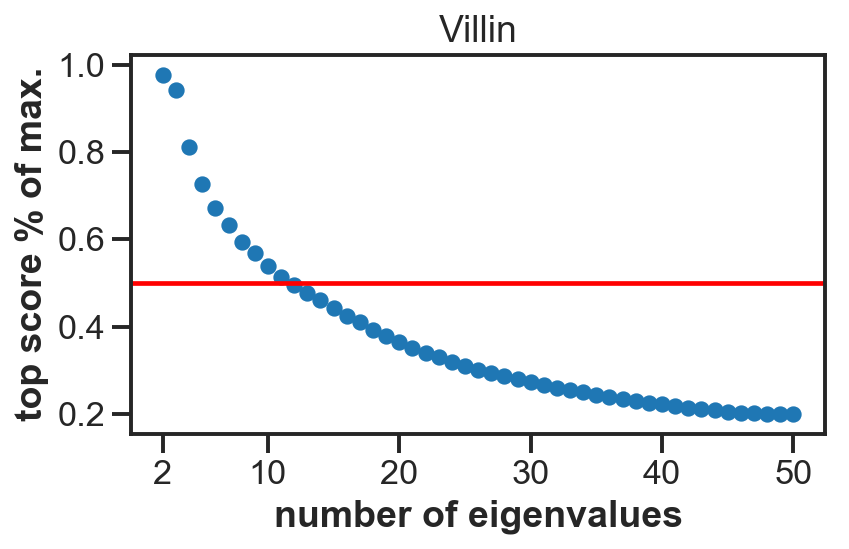

In [6]:
plt.figure(dpi=150)
plt.scatter(np.arange(2,51), max_mean_fraction, s=40)
plt.axhline(0.5, c='red')
plt.xticks([2,10,20,30,40,50])
plt.xlabel('number of eigenvalues', weight='bold')
plt.ylabel('top score % of max.', weight='bold')
plt.title('Villin')
plt.tight_layout()
plt.savefig('villin_fractions.png', dpi=300)
plt.savefig('villin_fractions.pdf')

## Number of eigenvalues is:

In [8]:
# which number of eigenvalues do we pick closest to 50%?

current_choice = np.argmin(np.abs(np.array(max_mean_fraction) - 0.5)) + 2
print(current_choice)

12


## Plot ordered scores

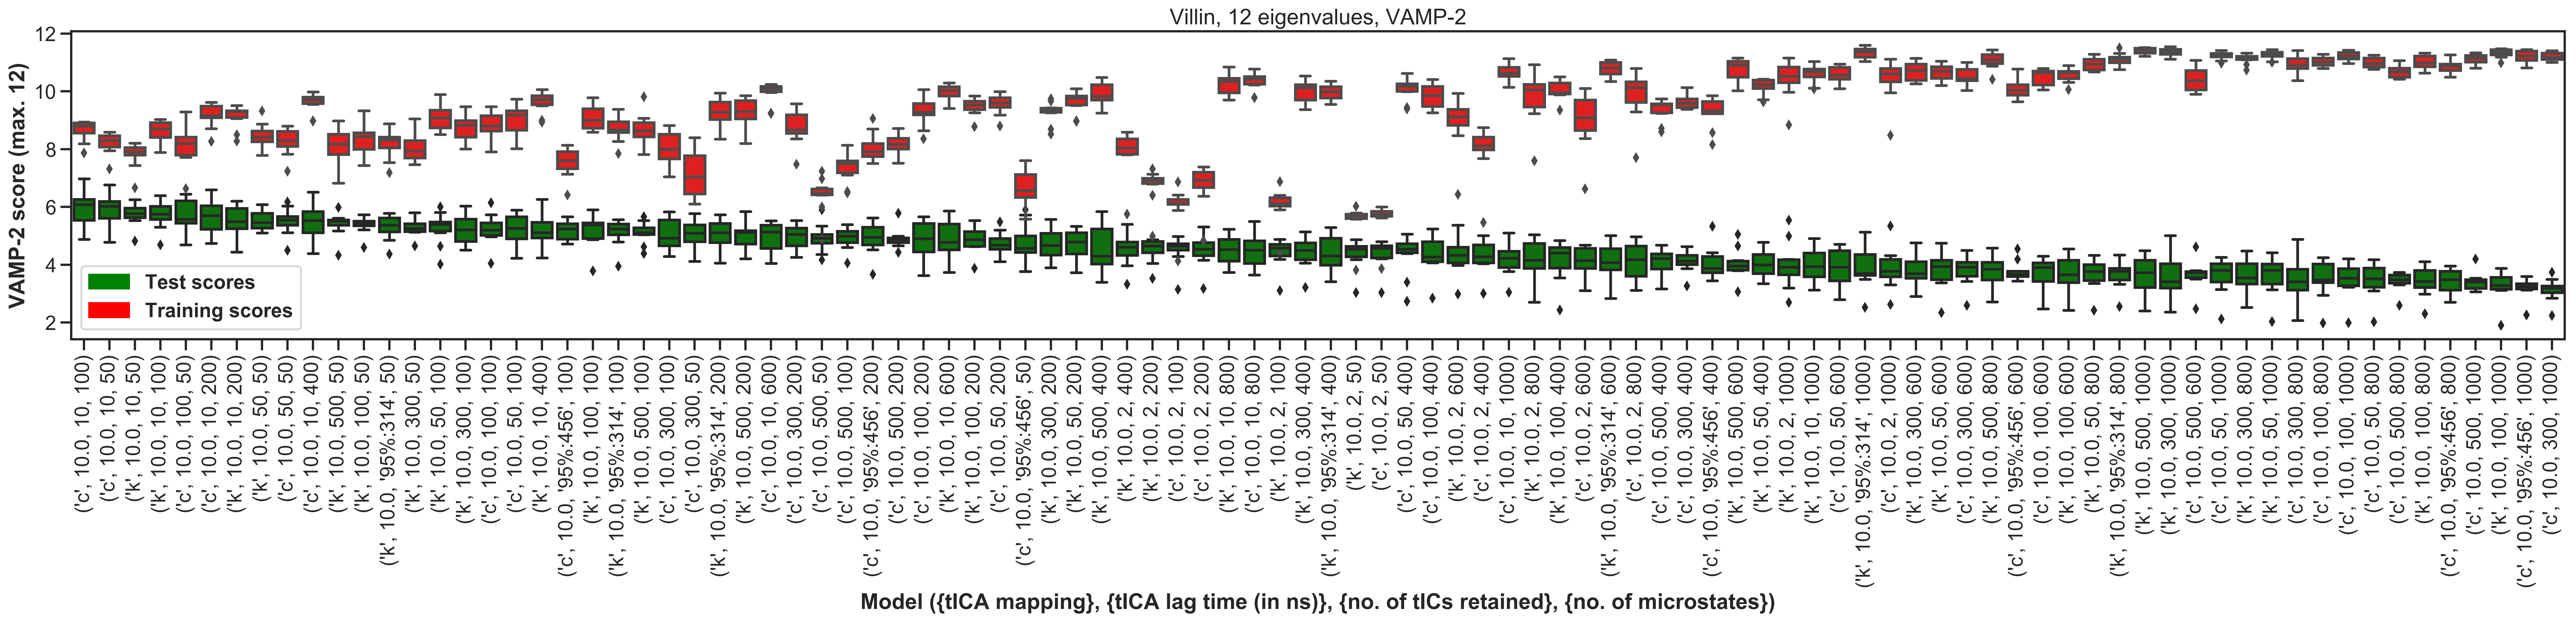

In [11]:
stride = 10.0 # ns/frame

output = scores
eigenvalues_no = 49 # how many numbers of eigenvalues we've tried
eigenvalues_index = current_choice - 2 # this is actual number of eigenvalues - 2 (2 is index 0)

# test scores

y_kinetic = []
y_commute = []
tic_nos_kinetic = []
tic_nos_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    tic_nos_kinetic_ = []
    tic_nos_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
            tic_nos_kinetic_.append(replicate[1][0])
            tic_nos_commute_.append(replicate[1][1])
    else:
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    if tic_nos_kinetic_:
        tic_nos_kinetic.append(np.max(tic_nos_kinetic_))
    else:
        tic_nos_kinetic.append(None)
    if tic_nos_commute_:
        tic_nos_commute.append(np.max(tic_nos_commute_))
    else:
        tic_nos_commute.append(None)
    
y = y_kinetic + y_commute

x = []

for index, model in enumerate(output[0]):
    if tic_nos_kinetic[index]:
        x.append(str(('k', model[0]*stride, '95%:' + str(tic_nos_kinetic[index]), model[2])))
    else:
        x.append(str(('k', model[0]*stride, model[1], model[2])))
for index, model in enumerate(output[0]):
    if tic_nos_commute[index]:
        x.append(str(('c', model[0]*stride, '95%:' + str(tic_nos_commute[index]), model[2])))
    else:
        x.append(str(('c', model[0]*stride, model[1], model[2])))

order_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores       

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model ({tICA mapping}, {tICA lag time (in ns)}, {no. of tICs retained}, {no. of microstates})', weight='bold')
plt.ylabel('VAMP-2 score (max. %d)' % current_choice, weight='bold')
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch], prop={'weight':'bold'})

plt.title('Villin, %d eigenvalues, VAMP-2' % current_choice)
plt.tight_layout()

plt.savefig('villin_msmlag10ns_%deigen_vamp2.png' % current_choice, dpi=300)
plt.savefig('villin_msmlag10ns_%deigen_vamp2.pdf' % current_choice)

## Top model is:

In [12]:
print(order[0])

('c', 10.0, 10, 100)
